# H-1B VISA PETITITON TREND DASHBOARD (2011-2016)

## (Chen & Associates Imigration Law Firm) 

This notebook analyzes historical H-1B visa petition data to identify trends and patterns that can inform client expectations and case strategy.

**Dataset**: H-1B Visa Petitions (Kaggle)

**Analysis Period**: 2011-2016

## 1. SETUP AND IMPORTS

In [1]:
# Import required libraries for data analysis and visualizations

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configure visualizations style
sns.set_style("whitegrid")
sns.set_palette("Set2")

## 2. DATA LOADING AND INITIAL EXPLORATION 

In [2]:
# Load dataset
df=pd.read_csv('h1b_kaggle.csv')

In [3]:
print("Dataset overview:")
print(f" - Total records loaded: {len(df):,}")
print(f" - Number of columns: {df.shape[1]}")
print(f" - Date range: 2011-2016")

Dataset overview:
 - Total records loaded: 3,002,458
 - Number of columns: 11
 - Date range: 2011-2016


In [4]:
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002458 entries, 0 to 3002457
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   CASE_STATUS         object 
 2   EMPLOYER_NAME       object 
 3   SOC_NAME            object 
 4   JOB_TITLE           object 
 5   FULL_TIME_POSITION  object 
 6   PREVAILING_WAGE     float64
 7   YEAR                float64
 8   WORKSITE            object 
 9   lon                 float64
 10  lat                 float64
dtypes: float64(4), int64(1), object(6)
memory usage: 252.0+ MB


## 3. DATA CLEANING AND PREPARATION 

In [5]:
# Check missing values
df.isnull().sum()

Unnamed: 0                 0
CASE_STATUS               13
EMPLOYER_NAME             59
SOC_NAME               17734
JOB_TITLE                 43
FULL_TIME_POSITION        15
PREVAILING_WAGE           85
YEAR                      13
WORKSITE                   0
lon                   107242
lat                   107242
dtype: int64

In [6]:
# Remove rows with missing critical fields

initial_count = len(df)
df = df.dropna(subset=['CASE_STATUS','YEAR'])
print(f"- Removed {initial_count -len(df):,} records with missing status/year")

- Removed 13 records with missing status/year


In [7]:
# Fill missing employer and job title with 'Unknown'
df['EMPLOYER_NAME'] = df['EMPLOYER_NAME'].fillna('UNKNOWN')
df['JOB_TITLE'] = df['JOB_TITLE'].fillna('UNKNOWN')

In [8]:
# Convert year column to integer type
df['YEAR'] = df['YEAR'].astype(int)

In [10]:
print(f"Final dataset: {len(df):,} petitions")
print(f" Years covered: {min(df['YEAR'])} to {max(df['YEAR'])}")

Final dataset: 3,002,445 petitions
 Years covered: 2011 to 2016


In [11]:
df.head(10)

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016,"ST. LOUIS, MISSOURI",-90.199404,38.627003
5,6,CERTIFIED-WITHDRAWN,BURGER KING CORPORATION,CHIEF EXECUTIVES,"EXECUTIVE V P, GLOBAL DEVELOPMENT AND PRESIDEN...",Y,225000.0,2016,"MIAMI, FLORIDA",-80.191790,25.761680
6,7,CERTIFIED-WITHDRAWN,BT AND MK ENERGY AND COMMODITIES,CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,91021.0,2016,"HOUSTON, TEXAS",-95.369803,29.760427
7,8,CERTIFIED-WITHDRAWN,"GLOBO MOBILE TECHNOLOGIES, INC.",CHIEF EXECUTIVES,CHIEF OPERATIONS OFFICER,Y,150000.0,2016,"SAN JOSE, CALIFORNIA",-121.886329,37.338208
8,9,CERTIFIED-WITHDRAWN,ESI COMPANIES INC.,CHIEF EXECUTIVES,PRESIDENT,Y,127546.0,2016,"MEMPHIS, TEXAS",NaN,NaN
9,10,WITHDRAWN,LESSARD INTERNATIONAL LLC,CHIEF EXECUTIVES,PRESIDENT,Y,154648.0,2016,"VIENNA, VIRGINIA",-77.265260,38.901223


## 4. VISUALIZATION 1: Overall Petition Status 

Display the distribution of petition outcomes using a pie chart

In [21]:
# Calculate petition counts by status
status_counts = df['CASE_STATUS'].value_counts()

# Display status breakdown in console
print("Petition Status Breakdown: ")
for status, count in status_counts.items():
    percentage = (count/len(df)) * 100
    print(f" - {status}: {count:,} petitions ({percentage:.1f}%)")

Petition Status Breakdown: 
 - CERTIFIED: 2,615,623 petitions (87.1%)
 - CERTIFIED-WITHDRAWN: 202,659 petitions (6.7%)
 - DENIED: 94,346 petitions (3.1%)
 - WITHDRAWN: 89,799 petitions (3.0%)
 - PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED: 15 petitions (0.0%)
 - REJECTED: 2 petitions (0.0%)
 - INVALIDATED: 1 petitions (0.0%)


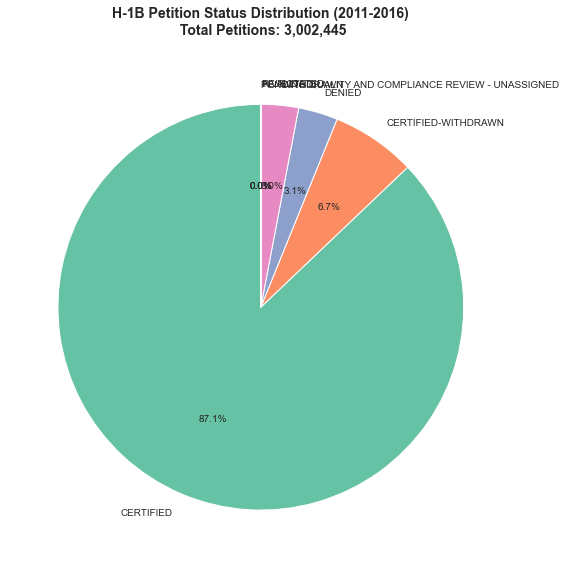

In [22]:
# Create pie chart showing status distribution
plt.figure(figsize=(10,8))
plt.pie(status_counts.values, labels=status_counts.index,autopct='%1.1f%%',startangle=90)
plt.title("H-1B Petition Status Distribution (2011-2016)\n Total Petitions: {:,}".format(len(df)),fontsize=14, fontweight='bold',pad=20)
plt.tight_layout()
plt.show()

## 5. VISUALIZATION 2: Petition Trends Over Time 

Analyze how petition outcomes have changed yar-over-year

In [23]:
# Group petitions by year and status
yearly = df.groupby(['YEAR','CASE_STATUS']).size().unstack(fill_value=0)

# Focus on main petition statuses
main_statuses =['CERTIFIED','DENIED','WITHDRAWN']
yearly_main = yearly[[col for col in main_statuses if col in yearly.columns]]

# Display yearly totals
print("Petitions by Year:")
for year, total in yearly_main.sum(axis=1).items():
    print(f" - {year} : {total:,} petitions")

Petitions by Year:
 - 2011 : 347,171 petitions
 - 2012 : 384,489 petitions
 - 2013 : 406,667 petitions
 - 2014 : 483,074 petitions
 - 2015 : 577,656 petitions
 - 2016 : 600,711 petitions


<Figure size 720x576 with 0 Axes>

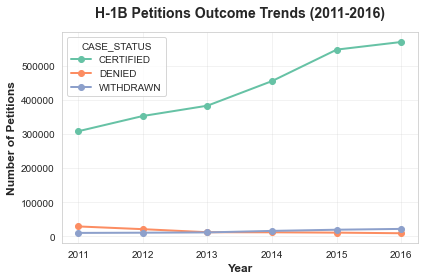

In [26]:
# Create line chart showings trends over time
plt.figure(figsize=(10,8))
yearly_main.plot(marker='o',linewidth=2)
plt.xlabel('Year',fontsize=12, fontweight='bold')
plt.ylabel("Number of Petitions",fontsize=12, fontweight='bold')
plt.title("H-1B Petitions Outcome Trends (2011-2016)",fontsize=14, fontweight='bold',pad=15)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 6. VISUALIZATION 3: Top 10 Employers by Petition Value

Identify the companies filing most 1-HB petitions

In [27]:
# Get top 10 employers by petition count
top_employers = df['EMPLOYER_NAME'].value_counts().head(10)

# Display top employers  in console
print("Top 10 Employers by Number of Petition Filed:")
for rank, (employer, count) in enumerate(top_employers.items(),1):
    # Truncate long names for display
    display_name = employer[:50] + '...' if len(employer) > 50 else employer
    print(f"{rank:2d}. {display_name}: {count:,} petitions")

Top 10 Employers by Number of Petition Filed:
 1. INFOSYS LIMITED: 130,592 petitions
 2. TATA CONSULTANCY SERVICES LIMITED: 64,726 petitions
 3. WIPRO LIMITED: 48,117 petitions
 4. DELOITTE CONSULTING LLP: 36,742 petitions
 5. IBM INDIA PRIVATE LIMITED: 34,219 petitions
 6. ACCENTURE LLP: 33,447 petitions
 7. MICROSOFT CORPORATION: 25,576 petitions
 8. HCL AMERICA, INC.: 22,678 petitions
 9. ERNST & YOUNG U.S. LLP: 18,232 petitions
10. COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION: 17,528 petitions


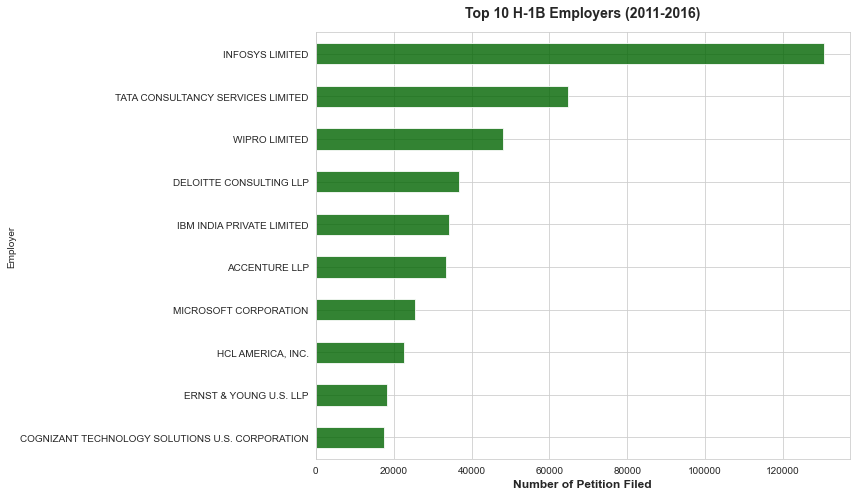

In [28]:
# Create horizontal bar chart for better readability of employer names
plt.figure(figsize=(12,7))
top_employers.plot(kind='barh',color='darkgreen',alpha=0.8)
plt.xlabel("Number of Petition Filed",fontsize=12, fontweight='bold')
plt.ylabel("Employer")
plt.title("Top 10 H-1B Employers (2011-2016)",fontsize=14, fontweight='bold',pad=15)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 7. VISUALIZATIONS 4: Top 10 Job Titles (Certified Petitions) 

Analyze the most common job titles for succesfully certified petitions

In [30]:
# Filter for only certified petitions
certified = df[df['CASE_STATUS']=='CERTIFIED']

# Get top 10 job titles from certified petitions
top_jobs = certified['JOB_TITLE'].value_counts().head(10)

# Display statistics
print(f"Total Certified Petitions: {len(certified):,} ({len(certified)/len(df)*100:.1f}% of all petitions)")
for rank, (job_title,count) in enumerate(top_jobs.items(),1):
    display_title=job_title[:50] + '...' if len(job_title) > 50 else job_title
    percentage = (count/len(certified)) * 100
    print(f" {rank:2d}. {display_title}: {count:,} ({percentage:.2f}%)")

Total Certified Petitions: 2,615,623 (87.1% of all petitions)
  1. PROGRAMMER ANALYST: 222,730 (8.52%)
  2. SOFTWARE ENGINEER: 102,990 (3.94%)
  3. COMPUTER PROGRAMMER: 64,018 (2.45%)
  4. SYSTEMS ANALYST: 55,744 (2.13%)
  5. SOFTWARE DEVELOPER: 37,771 (1.44%)
  6. BUSINESS ANALYST: 35,204 (1.35%)
  7. COMPUTER SYSTEMS ANALYST: 31,433 (1.20%)
  8. TECHNOLOGY LEAD - US: 28,280 (1.08%)
  9. TECHNOLOGY ANALYST - US: 25,985 (0.99%)
 10. SENIOR SOFTWARE ENGINEER: 23,547 (0.90%)


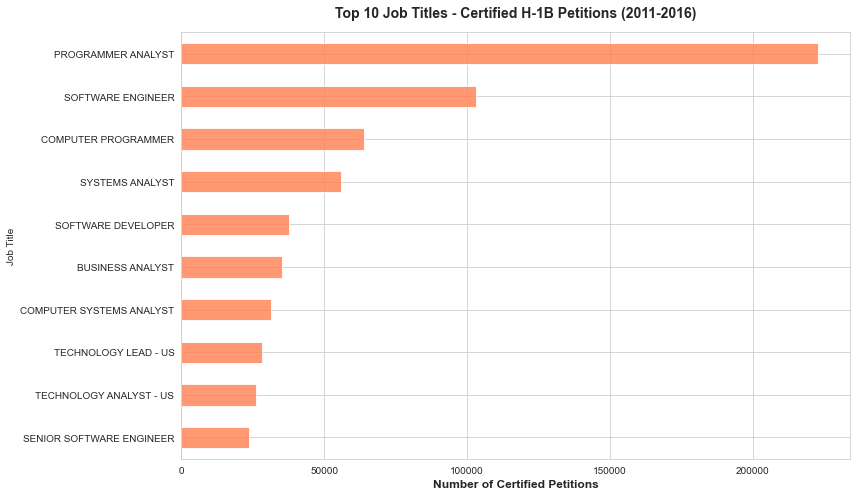

In [31]:
# Create horizontal bar chart for better readability of employer names
plt.figure(figsize=(12,7))
top_jobs.plot(kind='barh',color='coral',alpha=0.8)
plt.xlabel("Number of Certified Petitions",fontsize=12, fontweight='bold')
plt.ylabel("Job Title")
plt.title("Top 10 Job Titles - Certified H-1B Petitions (2011-2016)",fontsize=14, fontweight='bold',pad=15)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 8. EXECUTIVE SUMMARY AND KEY INSIGHTS 

In [36]:
# Calculate key performance metrics
total_petitions = len(df)
certified_count = len(certified)
denied_count =len(df[df['CASE_STATUS']=='DENIED'])
withdrawn_count =len(df[df['CASE_STATUS']=='WITHDRAWN'])

certification_rate = (certified_count/total_petitions) * 100
denial_rate = (denied_count/total_petitions) * 100
withdrawal_rate = (withdrawn_count/total_petitions)*100

# Display key metrics
print("KEY STATISTICS:")
print(f" - Total Petitions Analyzed: {total_petitions:,}")
print(f" - Certification Rate: {certification_rate:.1f}%")
print(f" - Denial Rate: {denial_rate:.1f}%")
print(f" - Withdrawal rate: {withdrawal_rate:.1f}%")

print("\nMARKET INISGHTS: ")
print(f" - Leading employer: {top_employers.index[0]}")
print(f" - Most Common Certified Role: {top_jobs.index[0]}")
print(f" - Primary Industry: Technology/IT Consulting")

print("\nCLIENT GUIDANCE: ")
print(f" - Historical certification rate of {certification_rate:.0f}% provides baseline expectations")
print(f" - Technology sector shows highest H-1B activiy")
print(f" - Denial rate of {denial_rate:.1f}% emphasizes importance of through prepartion")
print(f" - Large tech firms have established, high-volume H-1B programs")

KEY STATISTICS:
 - Total Petitions Analyzed: 3,002,445
 - Certification Rate: 87.1%
 - Denial Rate: 3.1%
 - Withdrawal rate: 3.0%

MARKET INISGHTS: 
 - Leading employer: INFOSYS LIMITED
 - Most Common Certified Role: PROGRAMMER ANALYST
 - Primary Industry: Technology/IT Consulting

CLIENT GUIDANCE: 
 - Historical certification rate of 87% provides baseline expectations
 - Technology sector shows highest H-1B activiy
 - Denial rate of 3.1% emphasizes importance of through prepartion
 - Large tech firms have established, high-volume H-1B programs


In [41]:
!jupyter nbconvert --to html h1b_dashboard.ipynb

[NbConvertApp] Converting notebook h1b_dashboard.ipynb to html
[NbConvertApp] Writing 808388 bytes to h1b_dashboard.html
